<a href="https://colab.research.google.com/github/nishvit/DNN/blob/master/first_dnn_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


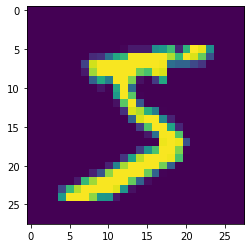

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
type (x_train)
x_train.shape

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.1957 - accuracy: 0.9442
Epoch 2/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0705 - accuracy: 0.9794
Epoch 3/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0541 - accuracy: 0.9830
Epoch 4/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0421 - accuracy: 0.9869
Epoch 5/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0346 - accuracy: 0.9890
Epoch 6/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0280 - accuracy: 0.9911
Epoch 7/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0225 - accuracy: 0.9925
Epoch 8/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0184 - accuracy: 0.9942
Epoch 9/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0156 - accuracy: 0.9947
Epoch 10/10
60000/60000 [==========================

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.09384630624112542, 0.9789000153541565]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.62550497e-18 1.03529350e-19 3.80653557e-15 5.68590341e-10
  2.63045580e-19 4.80114156e-18 5.83915652e-32 1.00000000e+00
  1.46348947e-14 1.86641804e-12]
 [3.07848300e-12 3.86690263e-10 1.00000000e+00 1.07808402e-12
  4.46269816e-24 7.26101511e-14 3.20193871e-09 1.27816983e-24
  2.16509821e-13 2.74555039e-18]
 [5.22715418e-08 9.99949932e-01 4.92223649e-07 1.86737448e-09
  2.97474489e-05 2.18430538e-10 4.37564290e-10 1.08797838e-06
  1.86858615e-05 2.19834129e-09]
 [1.00000000e+00 4.55143530e-21 1.68833014e-09 7.57325752e-16
  2.07007180e-18 2.97105404e-15 8.31136548e-12 5.78358908e-14
  2.44744071e-14 4.74912527e-15]
 [3.48638083e-13 3.90632219e-19 2.88966632e-13 8.13247126e-12
  1.00000000e+00 7.72868606e-19 7.19476204e-17 3.17827101e-12
  9.47215528e-10 2.56952610e-08]
 [7.83741017e-10 9.99980211e-01 3.53748719e-09 4.82712308e-11
  3.30849116e-06 8.46313037e-14 1.20046117e-12 8.09938683e-06
  8.30365934e-06 1.69772918e-09]
 [2.23162303e-21 3.30399029e-15 1.33567411e-11 1.45036723e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print (layer_dict)

{'conv2d_1': <keras.layers.convolutional.Conv2D object at 0x7f336949a470>, 'conv2d_2': <keras.layers.convolutional.Conv2D object at 0x7f336949af98>, 'conv2d_3': <keras.layers.convolutional.Conv2D object at 0x7f336949a588>, 'flatten_1': <keras.layers.core.Flatten object at 0x7f336949a4a8>, 'activation_1': <keras.layers.core.Activation object at 0x7f3369490860>}


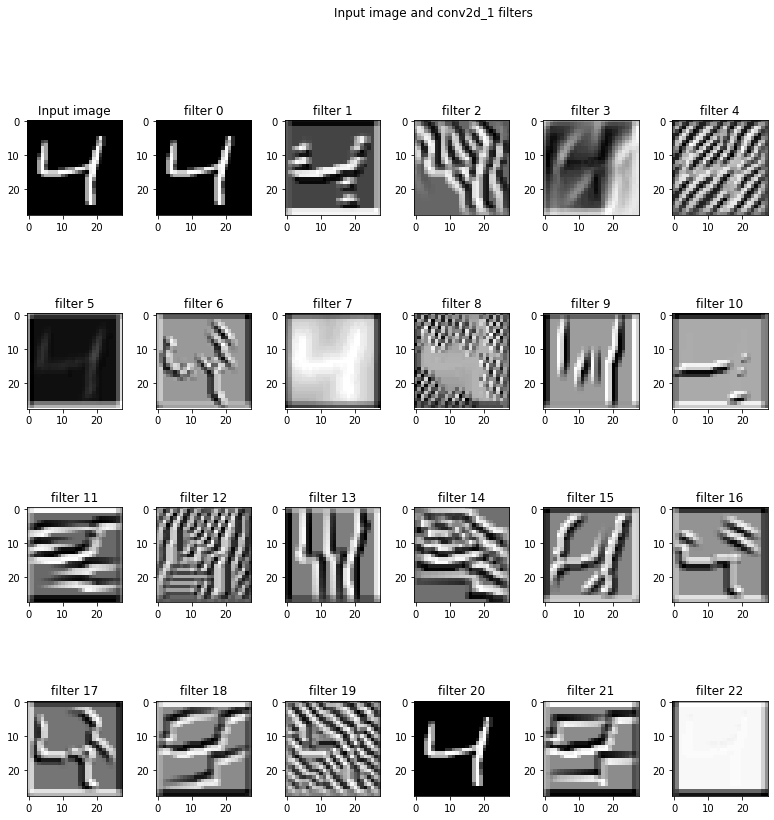

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()